### Wetterdaten für die gewählten Stationen einlesen und visualisieren

- gespeichert Daten laden
- Daten der letzten 3 Jahre darstellen

In [93]:
# Daten einlesen
wetterdaten <- readRDS("datasets/rds/wetterdaten.rds")

In [94]:
# Bei Bedarf verschiedene Informationen zu den Daten anzeigen

for (i in seq_along(wetterdaten)) {
  #print(names(wetterdaten)[i])
  #print(paste("Anzahl der Zeilen", names(wetterdaten[i]), ": ", nrow(wetterdaten[[i]])))
  #print(summary(wetterdaten[[i]]))
  #print(head(wetterdaten[[1]]))
  #print(nrow(wetterdaten[[1]]))
  #boxplot(wetterdaten[[i]]$TMK, main = names(wetterdaten)[i])
  #print(subset(wetterdaten[[i]], RSK > 400.0 | RSK < 0.0))
  #print(subset(wetterdaten[[i]], SDK > 24 | SDK < 0))
  #print(subset(wetterdaten[[i]], TMK > 60 | TMK < -60))
  #plot(wetterdaten[[i]]$MESS_DATUM, wetterdaten[[i]]$TMK, type = "l", col = "blue", xlab = "Datum", ylab = "Temperatur", main = names(wetterdaten)[i])
  #boxplot(wetterdaten[[i]]$TMK, main = names(wetterdaten)[i])
  #break
}

In [95]:
# Daten der letzten 3 Jahre extrahieren
# Numerische Darstellung der letzten 3 Jahre mit summary() erzeugen und speichern

start_datum <- as.Date("2021-01-01")
end_datum <- as.Date("2023-12-31")

file.create("outputs/numerisch_3_jahre.txt")

for (i in seq_along(wetterdaten)) {
  daten_letzten_3_jahre <- subset(wetterdaten[[i]], MESS_DATUM >= start_datum & MESS_DATUM <= end_datum)
  sink("outputs/numerisch_3_jahre.txt", append = TRUE)
  print(names(wetterdaten)[i])
  temp_subset <- daten_letzten_3_jahre[, c("RSK", "SDK", "TMK")]
  print(summary(temp_subset))
  cat("\n")
  sink()
}


[1] TRUE

In [59]:
# Graphen für alle Orte der letzten 3 Jahre erstellen

for (i in seq_along(wetterdaten)) {
  daten_letzten_3_jahre <- subset(wetterdaten[[i]], MESS_DATUM >= start_datum & MESS_DATUM <= end_datum)
  
  #RSK
  png_name <- paste("plots/3years/", names(wetterdaten)[i], "_RSK.png", sep = "")
  png(png_name, width=800, height=400)
  plot(daten_letzten_3_jahre$MESS_DATUM, daten_letzten_3_jahre$RSK,
  type = "l",
  col = "blue",
  xlab = "Jahr",
  ylab = "RSK",
  main = paste("RSK - tägliche Niederschlagshöhe in mm - " , names(wetterdaten)[i]))
  dev.off()
  
  #SDK
  png_name <- paste("plots/3years/", names(wetterdaten)[i], "_SDK.png", sep = "")
  png(png_name, width=800, height=400)
  plot(daten_letzten_3_jahre$MESS_DATUM, daten_letzten_3_jahre$SDK,
  type = "p",
  col = "orange",
  xlab = "Jahr",
  ylab = "SDK",
  main = paste("SDK - tägliche Sonnenscheindauer in h - ", names(wetterdaten)[i]))
  dev.off()
  
  #TMK
  png_name <- paste("plots/3years/", names(wetterdaten)[i], "_TMK.png", sep = "")
  png(png_name, width=800, height=400)
  plot(daten_letzten_3_jahre$MESS_DATUM, daten_letzten_3_jahre$TMK,
  type = "l",
  col = "green",
  xlab = "Jahr",
  ylab = "TMK",
  main = paste("TMK - Tagesmittel Lufttemperatur in °C in 2 m Höhe - ", names(wetterdaten)[i]))
  dev.off()
  
  #Kombiniert
  cex <- 2.3
  png_name <- paste("plots/3years/combined/", names(wetterdaten)[i], "_combined.png", sep = "")
  png(png_name, width=1280, height=720)
  # Set the number of rows in the plot layout
  par(mfrow = c(3, 1), oma = c(4, 0, 0, 0))

  # Plot the first variable (RSK)
  par(mar = c(0, 5, 3, 2))
  plot(daten_letzten_3_jahre$MESS_DATUM, daten_letzten_3_jahre$RSK,
    type = "l",
    col = "blue",
    xlab = "",
    ylab = "RSK",
    xaxt = "n",
    cex.lab=cex,
    cex.axis=cex,
    cex.main=cex)
  #mtext(paste("Kombiniert - ", names(wetterdaten)[i]), cex=cex)

  # Plot the second variable (SDK)
  par(mar = c(0, 5, 0, 2))
  plot(daten_letzten_3_jahre$MESS_DATUM, daten_letzten_3_jahre$SDK,
    type = "p",
    col = "orange",
    xlab = "",
    ylab = "SDK",
    xaxt = "n",
    cex.lab=cex,
    cex.axis=cex,
    cex.main=cex)

  # Plot the third variable (TMK)
  par(mar = c(2, 5, 0, 2))
  plot(daten_letzten_3_jahre$MESS_DATUM, daten_letzten_3_jahre$TMK,
    type = "l",
    col = "green",
    xlab = "Jahr",
    ylab = "TMK",
    cex.lab=cex,
    cex.axis=cex,
    cex.main=cex)

  dev.off()
  #break
}

In [60]:
# Überlagerte Graphen aller Orte der letzten 3 Jahre
daten_letzten_3_jahre <- subset(wetterdaten[[1]], MESS_DATUM >= start_datum & MESS_DATUM <= end_datum)
colors = list("green", "blue", "orange", "red", "purple", "black", "yellow", "pink", "brown", "grey")

#TMK
png_name <- paste("plots/3years/", "alle", "_TMK.png", sep = "")
png(png_name, width=800, height=400)
plot(daten_letzten_3_jahre$MESS_DATUM, 
    daten_letzten_3_jahre$TMK, 
    type = "n", col = "green", 
    xlab = "Jahr", 
    ylab = "TMK - Tagesmittel Lufttemperatur in °C in 2 m Höhe", 
    main = "Überlagerte TMK-Graphen der letzten 3 Jahre"
    )

for (i in seq_along(wetterdaten)) {
  daten_letzten_3_jahre <- subset(wetterdaten[[i]], MESS_DATUM >= start_datum & MESS_DATUM <= end_datum)
  lines(daten_letzten_3_jahre$MESS_DATUM, daten_letzten_3_jahre$TMK, type = "l", col = colors[[i]])
}
dev.off()

#RSK
png_name <- paste("plots/3years/", "alle", "_RSK.png", sep = "")
png(png_name, width=800, height=400)
plot(daten_letzten_3_jahre$MESS_DATUM,
  daten_letzten_3_jahre$RSK,
  type = "n", 
  col = "blue", 
  xlab = "Jahr", 
  ylab = "RSK - tägliche Niederschlagshöhe in mm", 
  main = "Überlagerte RSK-Graphen der letzten 3 Jahre"
  )
  
for (i in seq_along(wetterdaten)) {
  daten_letzten_3_jahre <- subset(wetterdaten[[i]], MESS_DATUM >= start_datum & MESS_DATUM <= end_datum)
  lines(daten_letzten_3_jahre$MESS_DATUM, daten_letzten_3_jahre$RSK, type = "l", col = colors[[i]])
}
dev.off()

#SDK
png_name <- paste("plots/3years/", "alle", "_SDK.png", sep = "")
png(png_name, width=800, height=400)
plot(daten_letzten_3_jahre$MESS_DATUM,
  daten_letzten_3_jahre$SDK,
  type = "n", 
  col = "orange", 
  xlab = "Jahr", 
  ylab = "SDK - tägliche Sonnenscheindauer in h", 
  main = "Überlagerte SDK-Graphen der letzten 3 Jahre"
  )

for (i in seq_along(wetterdaten)) {
  daten_letzten_3_jahre <- subset(wetterdaten[[i]], MESS_DATUM >= start_datum & MESS_DATUM <= end_datum)
  lines(daten_letzten_3_jahre$MESS_DATUM, daten_letzten_3_jahre$SDK, type = "p", col = colors[[i]])
}
dev.off()

png 
  2

png 
  2

png 
  2

### Visualisierung mit ggpllot 

In [61]:
# Installieren und Laden des ggplot2-Pakets
#install.packages("ggplot2")
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


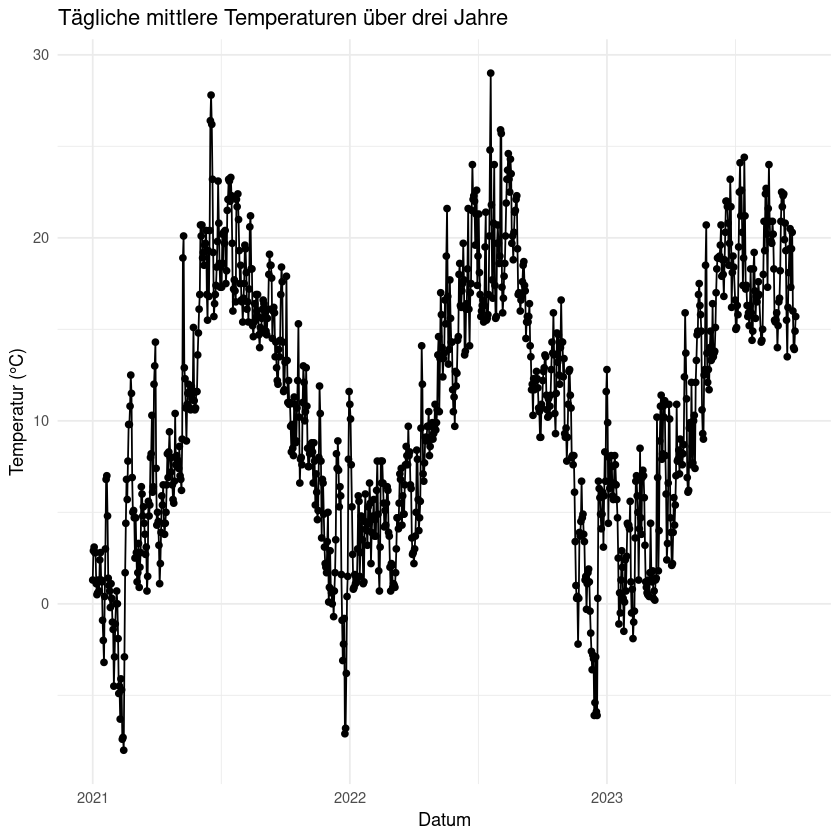

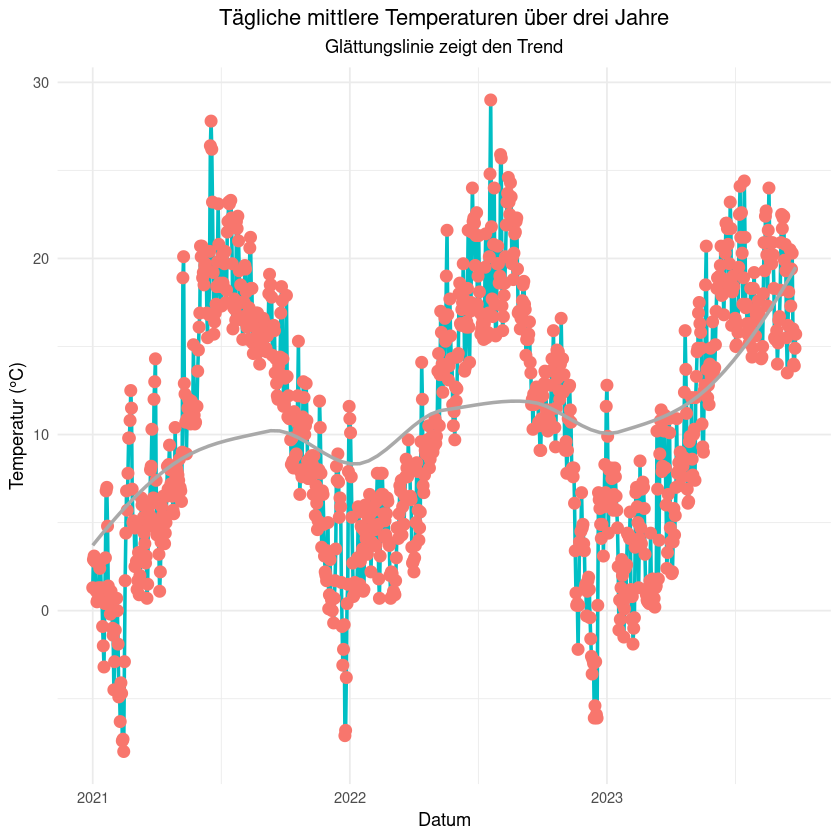

In [62]:
# Erstellen eines Plots
ggplot(daten_letzten_3_jahre, aes(x = MESS_DATUM, y = TMK)) +
  geom_line() +  # Linienplot
  geom_point() + # Punkte hinzufügen
  labs(title = "Tägliche mittlere Temperaturen über drei Jahre",
       x = "Datum", y = "Temperatur (°C)") +
  theme_minimal() # Minimalistisches Design

ggplot(daten_letzten_3_jahre, aes(x = MESS_DATUM, y = TMK)) +
  geom_line(color = "#00BFC4", size = 1) +  # Farbige Linie
  geom_point(color = "#F8766D", size = 3) +  # Farbige Punkte
  geom_smooth(method = "loess", se = FALSE, color = "darkgray", size = 1) +  # Glättungslinie
  labs(title = "Tägliche mittlere Temperaturen über drei Jahre",
       subtitle = "Glättungslinie zeigt den Trend",
       x = "Datum", y = "Temperatur (°C)") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),  # Zentrierter Titel
        plot.subtitle = element_text(hjust = 0.5))  # Zentrierter Untertitel